<a href="https://colab.research.google.com/github/pp2098/Email-Prediction/blob/main/Email_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer#converts text to numerical one
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Data collection & Preprocessing

In [2]:
#import dataset
mail=pd.read_csv('mail_data.csv')
mail.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#checking the size 
mail.shape

(5572, 2)

In [4]:
mail['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [5]:
#checking the null values
mail1=mail.where((pd.notnull(mail)),'')
mail1.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mail1.shape

(5572, 2)

In [7]:
mail1['Category']=mail1['Category'].apply(lambda x:1 if x=='ham' else 0)

In [8]:
mail1.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
mail1['Category'].value_counts()

1    4825
0     747
Name: Category, dtype: int64

In [10]:
#separating data as text and label
X=mail1['Message']
Y=mail1['Category']

In [11]:
#splitting the data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=45)
print("Train data: ",X_train.shape,Y_train.shape)
print("Test data: ",X_test.shape,Y_test.shape)

Train data:  (3900,) (3900,)
Test data:  (1672,) (1672,)


In [12]:
#converting text data into feature vectors(numerical value)i.e., feature extraction
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
#Tfid gives numerical value to text words
#min_df:if score is 1 then we have to ignore it,minimum score given by Tfidvector
#stop_vector:it will contains all words which are needed by us
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)




In [13]:
from sklearn.preprocessing import StandardScaler#Feature scaling
ss=StandardScaler(with_mean=False)
X_train_features=ss.fit_transform(X_train_features)
X_test_features=ss.transform(X_test_features)


Model Building

In [14]:
lg=LogisticRegression(random_state=10)
lg.fit(X_train_features,Y_train)
lg_pred_test=lg.predict(X_test_features)
lg_pred_train=lg.predict(X_train_features)

In [15]:
print("Accuracy score on training data: ",metrics.accuracy_score(lg_pred_train,Y_train))

Accuracy score on training data:  1.0


In [16]:
print("Accuracy score on testing data: ",metrics.accuracy_score(lg_pred_test,Y_test))

Accuracy score on testing data:  0.9694976076555024


Confusion Matrix:
[[ 175    2]
 [  49 1446]]


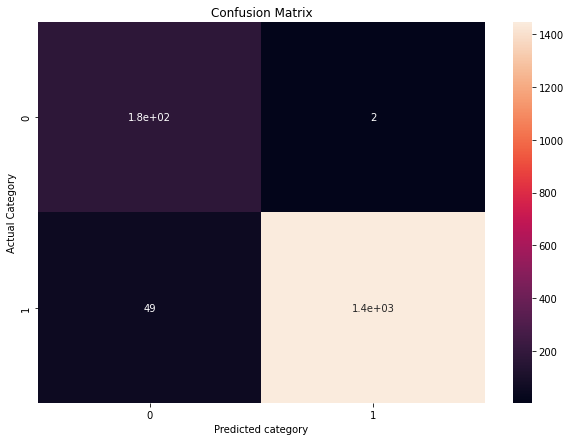

In [17]:
conf_lg=metrics.confusion_matrix(lg_pred_test,Y_test)
print("Confusion Matrix:")
print(conf_lg)
plt.figure(figsize=(10,7))
sns.heatmap(conf_lg,annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted category")
plt.ylabel("Actual Category")#1 for non spam and 0 for spam
plt.show()
#TP=1446,TN=175,FN=49,FP=2

In [18]:
print("Classification report")
print(metrics.classification_report(lg_pred_test,Y_test))

Classification report
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       177
           1       1.00      0.97      0.98      1495

    accuracy                           0.97      1672
   macro avg       0.89      0.98      0.93      1672
weighted avg       0.98      0.97      0.97      1672



AUC:  0.9893233277426993


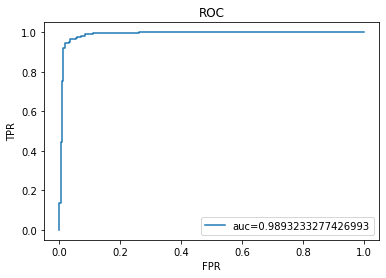

In [21]:
lg_pred_prob=lg.predict_proba(X_test_features)[::,1]
fpr,tpr,_=metrics.roc_curve(Y_test,lg_pred_prob)
auc=metrics.roc_auc_score(Y_test,lg_pred_prob)
print("AUC: ",auc)
plt.plot(fpr,tpr,label='auc='+str(auc))
plt.legend(loc=4)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
#Model is a showing a best curve fit and it is a good model

In [23]:
from sklearn.model_selection import cross_val_score
print("cross_val_score: ",cross_val_score(lg,X_train_features,Y_train,cv=10).mean())

cross_val_score:  0.9612820512820512


Prediction

In [19]:
input_data=["Ok lar... Joking wif u oni..."]
input_data1=feature_extraction.transform(input_data)
prediction=lg.predict(input_data1)
print(prediction)
if prediction==0:
  print("The Email is spam")
else:
  print("The Email is NON-spam")

[1]
The Email is NON-spam
